In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

# Посмотрим данные

In [3]:
df = pd.read_csv('aac_shelter_outcomes.csv')
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [4]:
# Размер данных
df.shape

(78256, 12)

In [5]:
# Посмотрим уникальные значения
# for i in df.columns:
#    print(f'\n\n        Униальные значения по признаку \'{i}\'\n')
#    print(df[i].value_counts())

In [6]:
df.describe().T

,count,unique,top,freq
age_upon_outcome,78248,46,1 year,14355
animal_id,78256,70855,A706536,11
animal_type,78256,5,Dog,44242
breed,78256,2128,Domestic Shorthair Mix,23335
color,78256,525,Black/White,8153
date_of_birth,78256,5869,2014-05-05T00:00:00,112
datetime,78256,64361,2016-04-18T00:00:00,39
monthyear,78256,64361,2016-04-18T00:00:00,39
name,54370,14574,Bella,344
outcome_subtype,35963,19,Partner,19660


In [7]:
# Посмотрим пропуски 
df.isna().sum()

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64

# По пропускам:
1. 8 записей (из 78248) по 'age_upon_outcome'(Сколько времени животное провело в приюте) можно убрать, т.к. 8 записей из 78248 - это очень мало
2. 23886 животных (почти треть) в приюте - безымянные. Выглядит логичным -> **отдельная категория**. Проанализируем, что делать с остальными записями
3. Подтип "выпуска из приюта" часто неопределен. Выглядит нормальным (у типов может не быть дополнительной классификации). Проверим
4. Для изначально 12 записей (из 78248) не задан тип выпуска из приюта (а это целевой признак). Уберем эти записи, т.к. их мало относительно объема данных
5. 2 пустые записи c 'пол животного при выпуске' также удалим

In [8]:
#1 - Убрали 8 записей
df = df.loc[df['age_upon_outcome'].isna() != 1]

In [9]:
#2 - Много уникальных имен
len(df['name'].unique())

14575

In [10]:
# Есть очень популярные имена:
print("Популярные имена: \n")
print(df['name'].value_counts().head())

# Есть редкие:
print("\n\nРедкие имена: \n")
print(df['name'].value_counts().tail())

Популярные имена: 

Bella       344
Max         319
Luna        239
Rocky       236
Princess    235
Name: name, dtype: int64


Редкие имена: 

Woadie          1
Bruce Willis    1
*Dj             1
*Oceana         1
Syphur          1
Name: name, dtype: int64


In [11]:
# Много имен, которые встречаются нечасто: Посмотрим, сколько имен встречаются до 20 раз
for i in range(1,51):
    df1 = df[df['name'].map(df['name'].value_counts()) == i]
    name_amt = len(df1) / i
    print(f'{i} раз - {name_amt}')
    
# Среди 14575 уникальных имен, 8276 имен встречаются 1 раз.

1 раз - 8276.0
2 раз - 2196.0
3 раз - 1038.0
4 раз - 651.0
5 раз - 446.0
6 раз - 304.0
7 раз - 267.0
8 раз - 193.0
9 раз - 163.0
10 раз - 119.0
11 раз - 110.0
12 раз - 67.0
13 раз - 64.0
14 раз - 63.0
15 раз - 52.0
16 раз - 41.0
17 раз - 41.0
18 раз - 31.0
19 раз - 31.0
20 раз - 30.0
21 раз - 25.0
22 раз - 15.0
23 раз - 27.0
24 раз - 17.0
25 раз - 13.0
26 раз - 22.0
27 раз - 17.0
28 раз - 19.0
29 раз - 12.0
30 раз - 8.0
31 раз - 8.0
32 раз - 12.0
33 раз - 15.0
34 раз - 10.0
35 раз - 10.0
36 раз - 8.0
37 раз - 6.0
38 раз - 5.0
39 раз - 6.0
40 раз - 3.0
41 раз - 6.0
42 раз - 7.0
43 раз - 4.0
44 раз - 3.0
45 раз - 8.0
46 раз - 1.0
47 раз - 4.0
48 раз - 4.0
49 раз - 5.0
50 раз - 0.0


In [12]:
# Можно объединить редкие имена в одну категорию, например 'Other_name'
# Будем считать имя редким, если оно встречается меньше 20 раз

n = 20

# Получим список редких имен
s = df['name'].value_counts() < 20
s = s[s == True]
#print(s.index)

#Получили список редких имен, теперь созданим новый столбец с заменными редкими именами

df.loc[df['name'].isin(s.index) , 'name_upd'] = 'Other_name'
df.loc[df['name'].isna(), 'name_upd'] = 'Unknown'
df.loc[df['name_upd'].isnull() , 'name_upd'] = df['name']

df['name_upd'].value_counts().head()

Other_name    35518
Unknown       23880
Bella           344
Max             319
Luna            239
Name: name_upd, dtype: int64

In [13]:
# 3
df1 = df[df['outcome_subtype'].isna() == True]
print(' Подтип отсутствует: \n')
print(df1['outcome_type'].value_counts())

df2 = df[df['outcome_subtype'].isna() == False]
print('\n\n Подтип определен: \n')
print(df2['outcome_type'].value_counts())

# Видна связь между типом и подтипом (логично). Например, для трансфера вообще нет подтипа. Заменим Nan на 'Not defined'

df.loc[df['outcome_subtype'].isna(), 'outcome_subtype'] = 'Not defined'

 Подтип отсутствует: 

Adoption           27186
Return to Owner    14354
Disposal             307
Euthanasia           170
Rto-Adopt            150
Died                  87
Relocate              16
Missing               11
Name: outcome_type, dtype: int64


 Подтип определен: 

Transfer      23497
Adoption       5926
Euthanasia     5906
Died            593
Missing          35
Name: outcome_type, dtype: int64


In [14]:
# 4, 5
df = df.loc[(df['outcome_type'].isna() != 1) & (df['sex_upon_outcome'].isna() != 1)]

# Посмотрим пропуски 
df.isna().sum()

age_upon_outcome        0
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23875
outcome_subtype         0
outcome_type            0
sex_upon_outcome        0
name_upd                0
dtype: int64

# Время:
1. Время до выпуска ('age_upon_outcome') сейчас представлено в неудобном текстовом формате. Переведем в удобный числовой формат
2. Представим date_of_birth, monthyear и datetime в UNIX

In [15]:
#1

# Посмотрим все уникальные значения в age_upon_outcome
df['age_upon_outcome'].unique()

array(['2 weeks', '1 year', '9 years', '5 months', '4 months', '3 years',
       '1 month', '3 months', '2 years', '2 months', '4 years', '8 years',
       '3 weeks', '8 months', '12 years', '7 years', '5 years', '6 years',
       '5 days', '10 months', '4 weeks', '10 years', '2 days', '6 months',
       '14 years', '11 months', '15 years', '7 months', '13 years',
       '11 years', '16 years', '9 months', '3 days', '6 days', '4 days',
       '5 weeks', '1 week', '1 day', '1 weeks', '0 years', '17 years',
       '20 years', '18 years', '19 years', '22 years', '25 years'],
      dtype=object)

In [16]:
# нужно распарсить строку после пробела (допустим до дней)

def age_parser(value):

    pos = value.find(' ') 
    
    if value[pos+1] == 'd':
        return int(value[0:pos])
    elif value[pos+1] == 'w':
        return int(value[0:pos]) * 7
    elif value[pos+1] == 'm':
        return int(value[0:pos]) * 30
    elif value[pos+1] == 'y':
        return int(value[0:pos]) * 365

# Добавим столбец с количество дней до выпуска из приюта
df['age_upon_outcome_period'] = df['age_upon_outcome'].apply(age_parser)
df['age_upon_outcome_period'].head(10)

0      14
1     365
2     365
3    3285
4     150
5     120
6     365
7    1095
8      30
9      90
Name: age_upon_outcome_period, dtype: int64

In [17]:
#2

import time
from datetime import date
from datetime import datetime

# Пусть будет 2010 год в качестве точки отсчета (потом можно заскелить)
d = date(2010, 1, 1)

unixtime_0 = time.mktime(d.timetuple()) 

def get_unix_time(value):
    dt = datetime.strptime(value, '%Y-%m-%dT%H:%M:%S')
    unixtime = time.mktime(dt.timetuple())
    return (unixtime - unixtime_0)

# Добавим колонки с UNIX временем
df['date_of_birth_unix'] = df['date_of_birth'].apply(get_unix_time)
df['datetime_unix'] = df['datetime'].apply(get_unix_time)
df['monthyear_unix'] = df['monthyear'].apply(get_unix_time)

df.head()
#df[['date_of_birth_unix', 'datetime_unix', 'monthyear_unix']].head(10)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,name_upd,age_upon_outcome_period,date_of_birth_unix,datetime_unix,monthyear_unix
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,Unknown,14,142387200.0,143741040.0,143741040.0
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,Lucy,365,89856000.0,121520820.0,121520820.0
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,Not defined,Adoption,Neutered Male,*Johnny,365,102384000.0,139501200.0,139501200.0
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,Other_name,3285,-144633600.0,140543400.0,140543400.0
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,Unknown,150,126748800.0,142437840.0,142437840.0


In [18]:
# Заметим, что 'datetime_unix', 'monthyear_unix' дублируют друг друга
df[['date_of_birth_unix', 'datetime_unix', 'monthyear_unix']].corr()

,date_of_birth_unix,datetime_unix,monthyear_unix
date_of_birth_unix,1.000000,0.383547,0.383547
datetime_unix,0.383547,1.000000,1.000000
monthyear_unix,0.383547,1.000000,1.000000


In [19]:
# Удалим все "старые" столбцы
df.drop(['name', 'age_upon_outcome', 'date_of_birth', 'datetime', 'monthyear'], axis = 1, inplace = True)
df.head()

,animal_id,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,name_upd,age_upon_outcome_period,date_of_birth_unix,datetime_unix,monthyear_unix
0,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,Unknown,14,142387200.0,143741040.0,143741040.0
1,A666430,Dog,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female,Lucy,365,89856000.0,121520820.0,121520820.0
2,A675708,Dog,Pit Bull,Blue/White,Not defined,Adoption,Neutered Male,*Johnny,365,102384000.0,139501200.0,139501200.0
3,A680386,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,Other_name,3285,-144633600.0,140543400.0,140543400.0
4,A683115,Other,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,Unknown,150,126748800.0,142437840.0,142437840.0


# ANIMAL_ID
Идентификатор представлен буквой A и кодом. Уберем код. Несмотря на то что, код везде уникальный можно попробовать использовать данный признак. Возможно, при развитии приюта (т.е. увеличении порядковых номеров) улучшался, например, уход за животными => повышался шанс на адоптацию

In [20]:
# Проверим, что в коде animal_id первый символ 'A'
df['animal_id1'] = df['animal_id'].apply(lambda x: x[0])
df['animal_id1'].unique()

array(['A'], dtype=object)

In [21]:
# Уберем букву
df.drop(['animal_id1'], axis = 1, inplace = True)
df['animal_id'] = df['animal_id'].apply(lambda x: x[1:])

In [22]:
df.head()

,animal_id,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,name_upd,age_upon_outcome_period,date_of_birth_unix,datetime_unix,monthyear_unix
0,684346,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,Unknown,14,142387200.0,143741040.0,143741040.0
1,666430,Dog,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female,Lucy,365,89856000.0,121520820.0,121520820.0
2,675708,Dog,Pit Bull,Blue/White,Not defined,Adoption,Neutered Male,*Johnny,365,102384000.0,139501200.0,139501200.0
3,680386,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,Other_name,3285,-144633600.0,140543400.0,140543400.0
4,683115,Other,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,Unknown,150,126748800.0,142437840.0,142437840.0


# ANIMAL_TYPE

In [23]:
# Мало уникальных значений
df['animal_type'].unique()

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

In [24]:
# преобразуем колонку animal_type в one-hot encoding вектор
one_hot = pd.get_dummies(df['animal_type'])
# Удаляем колонку species
df = df.drop(['animal_type'],axis = 1)
# добавляем колонку one-hot к исходной таблице
df = df.join(one_hot)
df.head()

,animal_id,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,name_upd,age_upon_outcome_period,date_of_birth_unix,datetime_unix,monthyear_unix,Bird,Cat,Dog,Livestock,Other
0,684346,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,Unknown,14,142387200.0,143741040.0,143741040.0,0,1,0,0,0
1,666430,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female,Lucy,365,89856000.0,121520820.0,121520820.0,0,0,1,0,0
2,675708,Pit Bull,Blue/White,Not defined,Adoption,Neutered Male,*Johnny,365,102384000.0,139501200.0,139501200.0,0,0,1,0,0
3,680386,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,Other_name,3285,-144633600.0,140543400.0,140543400.0,0,0,1,0,0
4,683115,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,Unknown,150,126748800.0,142437840.0,142437840.0,0,0,0,0,1


# Sex_upon_outcome

In [25]:
# Мало уникальных значений, аналогично предыдущему
df['sex_upon_outcome'].unique()

array(['Intact Male', 'Spayed Female', 'Neutered Male', 'Unknown',
       'Intact Female'], dtype=object)

In [26]:
# преобразуем колонку в one-hot encoding вектор
one_hot = pd.get_dummies(df['sex_upon_outcome'])
# Удаляем колонку species
df = df.drop(['sex_upon_outcome'],axis = 1)
# добавляем колонку one-hot к исходной таблице
df = df.join(one_hot)
df.head()

,animal_id,breed,color,outcome_subtype,outcome_type,name_upd,age_upon_outcome_period,date_of_birth_unix,datetime_unix,monthyear_unix,Bird,Cat,Dog,Livestock,Other,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,684346,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Unknown,14,142387200.0,143741040.0,143741040.0,0,1,0,0,0,0,1,0,0,0
1,666430,Beagle Mix,White/Brown,Partner,Transfer,Lucy,365,89856000.0,121520820.0,121520820.0,0,0,1,0,0,0,0,0,1,0
2,675708,Pit Bull,Blue/White,Not defined,Adoption,*Johnny,365,102384000.0,139501200.0,139501200.0,0,0,1,0,0,0,0,1,0,0
3,680386,Miniature Schnauzer Mix,White,Partner,Transfer,Other_name,3285,-144633600.0,140543400.0,140543400.0,0,0,1,0,0,0,0,1,0,0
4,683115,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,150,126748800.0,142437840.0,142437840.0,0,0,0,0,1,0,0,0,0,1


# ОТЧЕТ ПРОФАЙЛЕРА

In [27]:
# Отчет профайлера
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,78237
Total Missing (%),0.0%
Total size in memory,7.3 MiB
Average record size in memory,98.0 B
Numeric,4
Categorical,6
Boolean,10
Date,0
Text (Unique),0
Rejected,1


# Warnings профайлера 

* animal_id has a high cardinality: 70841 distinct values Warning - тут оставляем, несмотря на уникальность, возможно, с течением времени (увеличением номера), приют улучшался
* breed has a high cardinality: 2127 distinct values Warning - Нам нужно предсказать 'Outcome_type' - 'Тип выпуска из приюта'. По логике может зависеть от породы (например, у бойцовской породы собаки больше шансов выжить)
* color has a high cardinality: 525 distinct values Warning - Щенков необычных расцветок, возможно, разбирают лучше - оставляем, но обрабатываем
* monthyear_unix is highly correlated with datetime_unix (ρ = 1) Rejected - Убираем данный признак
* name_upd has a high cardinality: 423 distinct values Warning - Тоже оставляем. В зависимости от имени, возможно, разное отношение

# COLOR

In [28]:
# Считаем "компоненты" цвета
df['color_cnt'] = df['color'].apply(lambda x: x.count('/'))
df['color_cnt'].value_counts()

1    40966
0    37271
Name: color_cnt, dtype: int64

In [29]:
df.head()

,animal_id,breed,color,outcome_subtype,outcome_type,name_upd,age_upon_outcome_period,date_of_birth_unix,datetime_unix,monthyear_unix,...,Cat,Dog,Livestock,Other,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,color_cnt
0,684346,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Unknown,14,142387200.0,143741040.0,143741040.0,...,1,0,0,0,0,1,0,0,0,0
1,666430,Beagle Mix,White/Brown,Partner,Transfer,Lucy,365,89856000.0,121520820.0,121520820.0,...,0,1,0,0,0,0,0,1,0,1
2,675708,Pit Bull,Blue/White,Not defined,Adoption,*Johnny,365,102384000.0,139501200.0,139501200.0,...,0,1,0,0,0,0,1,0,0,1
3,680386,Miniature Schnauzer Mix,White,Partner,Transfer,Other_name,3285,-144633600.0,140543400.0,140543400.0,...,0,1,0,0,0,0,1,0,0,0
4,683115,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,150,126748800.0,142437840.0,142437840.0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
# Цвет описывается, либо 1, либо 2 параметрами
# Разбиваем цвет на 2 компоненты + по алфафиту

def define_color(value, order):
    
    if value['color_cnt'] == 0:
        return value['color']
    else:
        pos = value['color'].find('/')
        colors = [value['color'][0:pos], value['color'][pos+1:]]
        colors.sort()
        if order == 1:
            return colors[0]
        elif order == 2:
            return colors[1]    

# Добавим столбцы с цветами
df['color1'] = df.apply(define_color,order = 1, axis = 1)
df['color2'] = df.apply(define_color,order = 2, axis = 1) 
df.head()

,animal_id,breed,color,outcome_subtype,outcome_type,name_upd,age_upon_outcome_period,date_of_birth_unix,datetime_unix,monthyear_unix,...,Livestock,Other,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,color_cnt,color1,color2
0,684346,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Unknown,14,142387200.0,143741040.0,143741040.0,...,0,0,0,1,0,0,0,0,Orange Tabby,Orange Tabby
1,666430,Beagle Mix,White/Brown,Partner,Transfer,Lucy,365,89856000.0,121520820.0,121520820.0,...,0,0,0,0,0,1,0,1,Brown,White
2,675708,Pit Bull,Blue/White,Not defined,Adoption,*Johnny,365,102384000.0,139501200.0,139501200.0,...,0,0,0,0,1,0,0,1,Blue,White
3,680386,Miniature Schnauzer Mix,White,Partner,Transfer,Other_name,3285,-144633600.0,140543400.0,140543400.0,...,0,0,0,0,1,0,0,0,White,White
4,683115,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,150,126748800.0,142437840.0,142437840.0,...,0,1,0,0,0,0,1,0,Brown,Brown


In [31]:
# Удаляем ненужную информацию по цветам
df.drop(['color', 'color_cnt'], axis = 1, inplace = True)
df.head()

,animal_id,breed,outcome_subtype,outcome_type,name_upd,age_upon_outcome_period,date_of_birth_unix,datetime_unix,monthyear_unix,Bird,...,Dog,Livestock,Other,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,color1,color2
0,684346,Domestic Shorthair Mix,Partner,Transfer,Unknown,14,142387200.0,143741040.0,143741040.0,0,...,0,0,0,0,1,0,0,0,Orange Tabby,Orange Tabby
1,666430,Beagle Mix,Partner,Transfer,Lucy,365,89856000.0,121520820.0,121520820.0,0,...,1,0,0,0,0,0,1,0,Brown,White
2,675708,Pit Bull,Not defined,Adoption,*Johnny,365,102384000.0,139501200.0,139501200.0,0,...,1,0,0,0,0,1,0,0,Blue,White
3,680386,Miniature Schnauzer Mix,Partner,Transfer,Other_name,3285,-144633600.0,140543400.0,140543400.0,0,...,1,0,0,0,0,1,0,0,White,White
4,683115,Bat Mix,Rabies Risk,Euthanasia,Unknown,150,126748800.0,142437840.0,142437840.0,0,...,0,0,1,0,0,0,0,1,Brown,Brown


# Остальные категориальные признаки

In [32]:
# Остальные категории объемные, поэтому для остальных признаков пойдем через LABEL_ENCODER

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['breed_le'] = le.fit_transform(df['breed'])
df['outcome_subtype_le'] = le.fit_transform(df['outcome_subtype'])
df['name_upd_le'] = le.fit_transform(df['name_upd'])
df['color1_le'] = le.fit_transform(df['color1'])
df['color2_le'] = le.fit_transform(df['color2'])

# ЦЕЛЕВОЕ ЗНАЧЕНИЕ НЕ БУДЕМ КОДИРОВАТЬ (А МОЖНО И КОДИРОВАТЬ)
#df['outcome_type_le'] = le.fit_transform(df['outcome_type'])

# ЗАОДНО УБЕРЕМ И monthyear_unix
df.drop(['color1', 'color2', 'name_upd', 'outcome_subtype', 'breed', 'monthyear_unix'], axis = 1, inplace = True)

df.head()

,animal_id,outcome_type,age_upon_outcome_period,date_of_birth_unix,datetime_unix,Bird,Cat,Dog,Livestock,Other,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,breed_le,outcome_subtype_le,name_upd_le,color1_le,color2_le
0,684346,Transfer,14,142387200.0,143741040.0,0,1,0,0,0,0,1,0,0,0,937,13,409,39,38
1,666430,Transfer,365,89856000.0,121520820.0,0,0,1,0,0,0,0,0,1,0,255,13,270,15,55
2,675708,Adoption,365,102384000.0,139501200.0,0,0,1,0,0,0,0,1,0,0,1612,11,45,7,55
3,680386,Transfer,3285,-144633600.0,140543400.0,0,0,1,0,0,0,0,1,0,0,1467,13,308,55,55
4,683115,Euthanasia,150,126748800.0,142437840.0,0,0,0,0,1,0,0,0,0,1,253,15,409,15,15


In [33]:
df.head()

,animal_id,outcome_type,age_upon_outcome_period,date_of_birth_unix,datetime_unix,Bird,Cat,Dog,Livestock,Other,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,breed_le,outcome_subtype_le,name_upd_le,color1_le,color2_le
0,684346,Transfer,14,142387200.0,143741040.0,0,1,0,0,0,0,1,0,0,0,937,13,409,39,38
1,666430,Transfer,365,89856000.0,121520820.0,0,0,1,0,0,0,0,0,1,0,255,13,270,15,55
2,675708,Adoption,365,102384000.0,139501200.0,0,0,1,0,0,0,0,1,0,0,1612,11,45,7,55
3,680386,Transfer,3285,-144633600.0,140543400.0,0,0,1,0,0,0,0,1,0,0,1467,13,308,55,55
4,683115,Euthanasia,150,126748800.0,142437840.0,0,0,0,0,1,0,0,0,0,1,253,15,409,15,15


# НОРМАЛИЗАЦИЯ

In [34]:
from sklearn import preprocessing

y = df['outcome_type']
X = df.drop(['outcome_type'], axis = 1)

#Задаем максимум и минимум новой нормализованной выборки через feature_range
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

# Запоминаем названия столбцов
headers = list(X.columns.values)

# Трансформируем регрессоры, масштабируя каждую переменную к указанному диапазону
# Получааем построчный numpy array
np_scaled = min_max_scaler.fit_transform(X)

# Преобразуем в DataFrame
X_norm = pd.DataFrame(np_scaled)

# Восстанавливаем названия столбцов
X_norm.columns = headers
X_norm.head()

,animal_id,age_upon_outcome_period,date_of_birth_unix,datetime_unix,Bird,Cat,Dog,Livestock,Other,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,breed_le,outcome_subtype_le,name_upd_le,color1_le,color2_le
0,0.784905,-0.996932,0.733572,-0.628533,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-0.118532,0.368421,0.938389,0.368421,0.333333
1,0.737756,-0.920000,0.605720,-0.953175,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.760113,0.368421,0.279621,-0.473684,0.929825
2,0.762173,-0.920000,0.636211,-0.690478,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.516463,0.157895,-0.786730,-0.754386,0.929825
3,0.774484,-0.280000,0.035012,-0.675251,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.380056,0.368421,0.459716,0.929825,0.929825
4,0.781665,-0.967123,0.695510,-0.647573,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-0.761994,0.578947,0.938389,-0.473684,-0.473684


# ЦЕЛЕВОЕ ЗНАЧЕНИЕ

In [35]:
#y = df['outcome_type_le']
y.head()

0      Transfer
1      Transfer
2      Adoption
3      Transfer
4    Euthanasia
Name: outcome_type, dtype: object

# ДЕРЕВО РЕШЕНИЙ

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

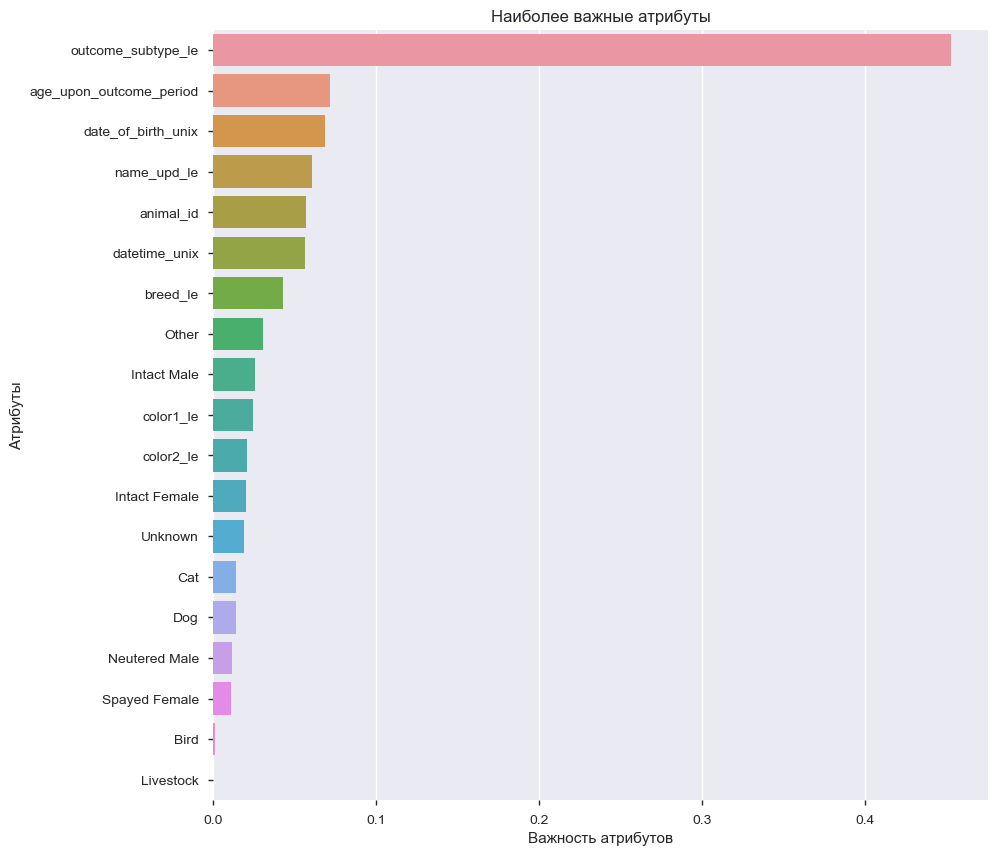

In [37]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators = 100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

# вклад каждого из регрессоров в целевое значение, 
feature_imp = pd.Series(model.feature_importances_, index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
#plt.legend()
plt.show()

In [38]:
from sklearn.metrics import classification_report


model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

       Adoption       0.84      0.89      0.87      9912
           Died       0.86      0.72      0.78       200
       Disposal       0.64      0.62      0.63       104
     Euthanasia       0.97      0.96      0.97      1864
        Missing       0.33      0.06      0.11        16
       Relocate       0.00      0.00      0.00         3
Return to Owner       0.71      0.63      0.67      4280
      Rto-Adopt       0.00      0.00      0.00        47
       Transfer       1.00      1.00      1.00      7046

       accuracy                           0.88     23472
      macro avg       0.60      0.54      0.56     23472
   weighted avg       0.87      0.88      0.87     23472



0.8778118609406953

# РЕЗУЛЬТАТ в 88 %